In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from pandas import Series, DataFrame

%matplotlib inline

In [2]:
# 数据来源：https://s3.amazonaws.com/tripdata/index.html
# 偷懒只处理最近6个月数据
bike_df = pd.read_csv('data/citibike/JC-201704-citibike-tripdata.csv')
bike_df = bike_df.append(pd.read_csv('data/citibike/JC-201705-citibike-tripdata.csv'), ignore_index=False)
bike_df = bike_df.append(pd.read_csv('data/citibike/JC-201706-citibike-tripdata.csv'), ignore_index=False)
bike_df = bike_df.append(pd.read_csv('data/citibike/JC-201707-citibike-tripdata.csv'), ignore_index=False)
bike_df = bike_df.append(pd.read_csv('data/citibike/JC-201708-citibike-tripdata.csv'), ignore_index=False)
bike_df = bike_df.append(pd.read_csv('data/citibike/JC-201709-citibike-tripdata.csv'), ignore_index=False)
print(bike_df.shape)
bike_df.head()

NameError: name 'pd' is not defined

In [3]:
print('租赁点：%d' % len(bike_df['start station name'].unique()))
print('被骑自行车数量：%d' % len(bike_df['bikeid'].unique()))
print('骑行次数：%d' % bike_df.shape[0])
print('每部骑行时长（分钟）：%.2f' % float(bike_df['tripduration'].sum() / bike_df['bikeid'].count() / 60))
print('租借频率：%.2f' % float(bike_df['bikeid'].count() / len(bike_df['bikeid'].unique())))

租赁点：52
被骑自行车数量：883
骑行次数：181376
每部骑行时长（分钟）：14.09
租借频率：205.41


In [4]:
# 按月统计
bike_df['starttime']=pd.to_datetime(bike_df['starttime'])
bike_df = bike_df.set_index('starttime') # 转成时间序列
print(bike_df.head())
bike_df_by_month = bike_df.resample('M').apply(len)
bike_df_by_month = bike_df_by_month['bikeid']
bike_df_by_month

                     tripduration             stoptime  start station id  \
starttime                                                                  
2017-04-01 00:14:36           252  2017-04-01 00:18:48              3186   
2017-04-01 00:15:47           452  2017-04-01 00:23:20              3203   
2017-04-01 00:46:27           465  2017-04-01 00:54:13              3271   
2017-04-01 00:47:15           417  2017-04-01 00:54:13              3271   
2017-04-01 01:13:12           391  2017-04-01 01:19:44              3183   

                      start station name  start station latitude  \
starttime                                                          
2017-04-01 00:14:36        Grove St PATH               40.719586   
2017-04-01 00:15:47        Hamilton Park               40.727596   
2017-04-01 00:46:27  Danforth Light Rail               40.692640   
2017-04-01 00:47:15  Danforth Light Rail               40.692640   
2017-04-01 01:13:12       Exchange Place               40.7

starttime
2017-04-30    21186
2017-05-31    25966
2017-06-30    32060
2017-07-31    33573
2017-08-31    35472
2017-09-30    33119
Freq: M, Name: bikeid, dtype: int64

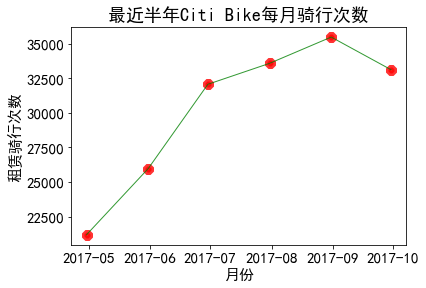

In [5]:
# 画出每月骑行次数
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False   #用来正常显示负号
plt.rc('font', family='SimHei', size=15)
plt.plot(bike_df_by_month, 'r8', bike_df_by_month, 'g-', linewidth=1, markeredgewidth=5, alpha=0.8)
plt.xlabel('月份')
plt.ylabel('租赁骑行次数')
plt.title('最近半年Citi Bike每月骑行次数')
plt.show()

In [6]:
# 画出按季度的分布
bike_df_by_quarter = bike_df.resample('Q').apply(len)
bike_df_by_quarter = bike_df_by_quarter['bikeid']
print(bike_df_by_quarter)

starttime
2017-06-30     79212
2017-09-30    102164
Freq: Q-DEC, Name: bikeid, dtype: int64


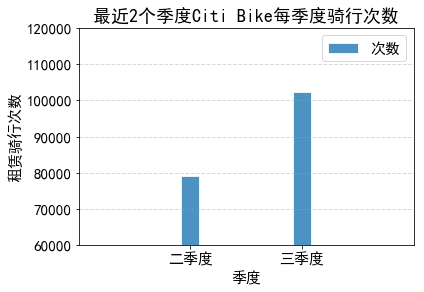

In [7]:
#绘制按季度汇总的骑行次数柱状图
plt.bar([10,15], bike_df_by_quarter, alpha=0.8, align='center', edgecolor='white')
plt.xlabel('季度')
plt.ylabel('租赁骑行次数')
plt.title('最近2个季度Citi Bike每季度骑行次数')
plt.legend(['次数'], loc='upper right')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.4)
plt.xlim(5, 20)
plt.ylim(60000, 120000)
plt.xticks([10,15], ('二季度','三季度'))
plt.show()

In [1]:
bike_df.groupby('gender')['bikeid'].agg(len)

NameError: name 'bike_df' is not defined

gender
0     8.371008
1    70.674180
2    20.954812
Name: bikeid, dtype: float64


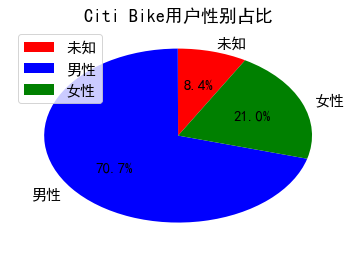

In [8]:
# 画出性别分布
bike_df_by_gender= bike_df.groupby('gender')['bikeid'].agg(len) / bike_df["bikeid"].count() * 100
print(bike_df_by_gender)
# plt.pie(bike_df_by_gender,labels=['未知', '男性', '女性'], colors=['red', 'blue', 'green'],explode=(0, 0, 0),startangle=60,autopct='%1.1f%%')
plt.pie(bike_df_by_gender,labels=['未知', '男性', '女性'], colors=['red', 'blue', 'green'], explode=(0, 0, 0), startangle=60, autopct='%1.1f%%')
plt.title('Citi Bike用户性别占比')
plt.legend(['未知', '男性', '女性'], loc='upper left')
plt.show()

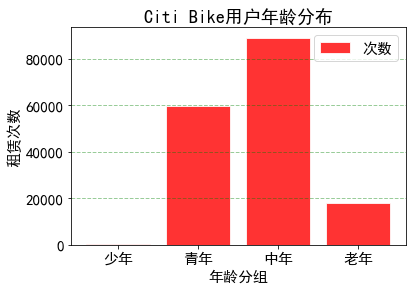

In [9]:
# 画出年龄分布
bike_df['age'] = 2016 - bike_df['birth year'] # 大于100岁虽然不合理，但先不管了，暂时保留。(15, 129)
bins = [0, 18, 30, 50, 131]
age_group = ['少年', '青年', '中年', '老年']
bike_df['age_group'] = pd.cut(bike_df['age'], bins, labels=age_group)
bike_df_by_ag = bike_df.groupby('age_group')['age_group'].agg(len)
# mean_ages = bike_df.groupby('age_group')['age'].mean()
# print(bike_df.groupby('age_group')['age_group'].value_counts())
plt.bar([1,2,3,4], bike_df_by_ag, color='red', alpha=0.8, align='center', edgecolor='white')
plt.xlabel('年龄分组')
plt.ylabel('租赁次数')
plt.title('Citi Bike用户年龄分布')
plt.legend(['次数'], loc='upper right')
plt.grid(color='green', linestyle='--', linewidth=1, axis='y', alpha=0.4)
plt.xticks([1,2,3,4], ('少年','青年','中年','老年'))
plt.show()

In [10]:
# 平均速度计算
#通过经纬度计算距离的函数，网上可以找到。
def haversine(lon1, lat1, lon2, lat2): # 经度1，纬度1，经度2，纬度2 （十进制度数）
    from math import radians, cos, sin, asin, sqrt  
    """ 
    Calculate the great circle distance between two points  
    on the earth (specified in decimal degrees) 
    """  
    # 将十进制度数转化为弧度  
    lon1= map(radians, np.array(lon1))  
    lat1= map(radians, np.array(lat1))
    lon2= map(radians, np.array(lon2))
    lat2= map(radians, np.array(lat2))
    lon1 = np.array(list(lon1)).reshape(-1,1)
    lon2 = np.array(list(lon2)).reshape(-1,1)
    lat1 = np.array(list(lat1)).reshape(-1,1)
    lat2 = np.array(list(lat2)).reshape(-1,1)
    # haversine公式  
    dlon = lon2 - lon1
    dlat = lat2 - lat1 

    a = (np.sin(dlat/2) ** 2) + np.cos(lat1) * np.cos(lat2) * (np.sin(dlon / 2)**2)
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371 # 地球平均半径，单位为公里  
    return c * r * 1000

start_lon = bike_df['start station longitude']
start_lat = bike_df['start station latitude']
end_lon = bike_df['end station longitude']
end_lat = bike_df['end station latitude']
bike_df['meter']=haversine(start_lon, start_lat, end_lon, end_lat)
bike_df["duration_hour"] = bike_df["tripduration"] / 3600.0 # 转换为小时数
bike_df["speed"] = bike_df["meter"]/ 1000.0 / bike_df["duration_hour"]
total_km = bike_df["meter"].sum() / 1000.0
total_hour = bike_df["tripduration"].sum() / 3600.0
speed = total_km / total_hour
print('%.2f' % speed)

156.13
